# MissiePlots: cubeslicer tutorial
## *Ploting slices of a 3D data cube in 2D and 3D with ease*

In [1]:
### Adds the MissiePlots directory to the system path ###
import os
import sys
sys.path.append(os.path.abspath(".."))

import numpy as np

### If you add the directory above MissiePlots to the system path instead, use MissiePlots.cubeslicer ###
from cubeslicer import Cube, Slice, CubeSlice

### Generating an cube to plot

In [2]:
x = np.arange(-1,1,0.01)[:, np.newaxis, np.newaxis]
y = np.arange(-1.5,1.5,0.01)[np.newaxis, :, np.newaxis]
z = np.arange(-2,2,0.01)[np.newaxis, np.newaxis, :]

def func(x,y,z): return np.exp(-(x**2 + y**2 + z**2))

cube = func(x,y,z)

## The Cube function: plotting cube slices in 3D

### Quick start:
Taking the cube as an input, the only other information this funcion requires is the slices to be plotted. These are specified in a dictionary with keys 0,1,2. The first key in the dictionary specifies which axis of the cube is to be plotted on the x axis of the plot, the second, the y axis and the third, the z axis. The values in the dictionary can either be a list of integers, a numpy array of integers, an integer or None where None is used if no slices are to be plotted along that axis. The slices are specified using the cube indexes and not the x,y,z on the plot which can be changes later.

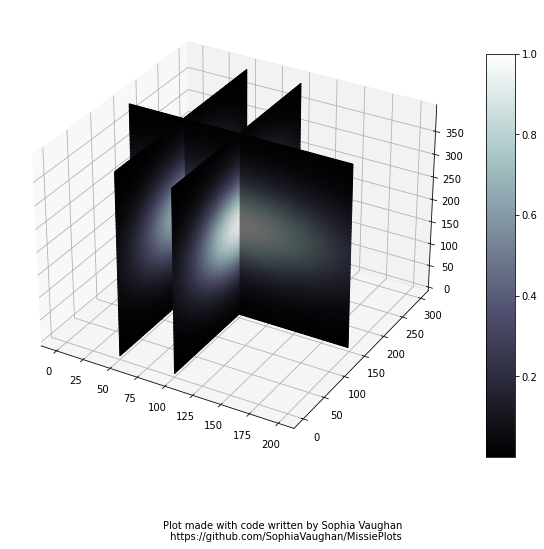

In [3]:
Cube(cube, {0:[50, 100], 1:150, 2:None})

### Keyword arguments:
There are a lot of keyword arguments that can be supplied to this code. Examples for all of them are as follows. </br>
**scales:** To alter the x,y,z scales on the plot pass a dictionary to the scales keyword with the keys 0,1,2 leading to arrays for the x,y,z value of the cube along that axis. The length must therefore be the same as the length of the cube along that axis. Slices are still specified by cube index. </br>
**saveloc:** default: './' - a string specifying the save location for the plot. </br>
**savename:** default: None - a string for the file name (no extention needed) or None if the plot is to been shown instead of saves. </br>
**figsize:** default: (8,8) - a tuple (a,b) where a, b are numbers specifying the figsize. </br>
**font_scale:** default: 1 - an overall scaling for the fontsizes (not recomended to change). </br>
**title:** the title of the plot (str). </br>
**xlabel, ylabel, zlabel, cbarlabel:** the labels for the axis and colorbar respectivly (str). </br>
**xticks, yticks, zticks, cbarticks:**  the ticks to display for each axis/colorbar (list, np.array). </br>
**xlim, ylim, zlim, cbarlim:**  a length two list with the lower and upper limits of the axis/colorbar. Warning: no cliping is done for the 3d plot so the slices may spill off the edge of the axis. </br>
**cbar_marks:** a list of numbers corresponding to the values of the colorbar to mark. </br>
**cbar_mark_labels:** a list of strings or numbers with which to label the colorbar marks. </br>
**cmap:** default: plt.cm.bone - The matplotlib colormap to us. </br>
**norm:** default: None - the normalisation of the colormap. </br>
**zorder_function:** default: internal funtion - a function that takes in the average x,y,z position of a slice and outputs a number specifying the plotting order. Do not change this unless the plotting breaks and some slices appear ontop of others when they shouldn't. </br>


In [4]:
# Because I am lazy I am passing this as dict but you don't have to
keywordexamples = {
    'figsize':(9,8),
    'title':'What a lovely plot!',
    'font_scale':1.2,
    'xlabel':'The x axis',
    'ylabel':'why?......',
    'zlim':[-2.1,2.1],
    'yticks':[-1,0,1],
    'cbarlabel':"It's colour not color",
    'cbar_marks':[0.25,0.5,0.75],
    'cbar_mark_labels':['*', '%', '~'],
    'norm':np.arange(0,1.1,0.1)
    }

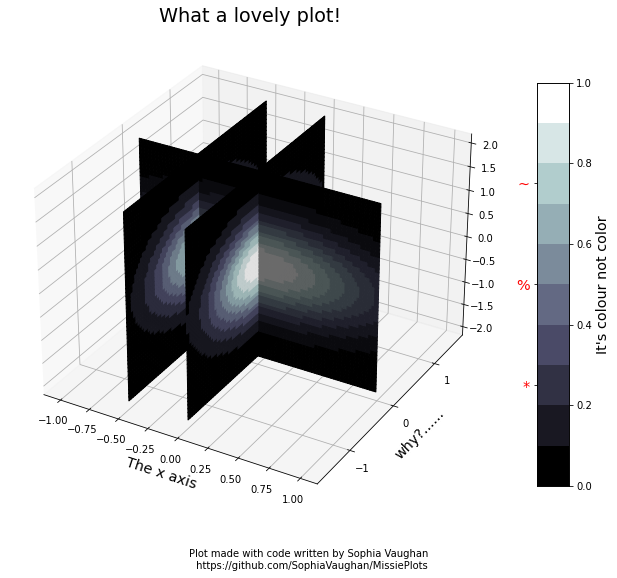

In [5]:
Cube(cube, {0:[50, 100], 1:150, 2:None}, scales={0:x, 1:y, 2:z}, **keywordexamples)

## The Slice function: plotting cube slices in 2D

### Quick start:
As before, aside from the cube, the only other information this funcion requires is the slices to be plotted. These are specified in a dictionary with keys 0,1,2. The first key in the dictionary specifies which axis of the cube is to be plotted on the x axis of the plot, the second, the y axis and the third, the z axis. The values in the dictionary can either be a list of integers, a numpy array of integers, an integer or None where None is used if no slices are to be plotted along that axis. The slices are specified using the cube indexes and not the x,y,z on the plot which can be changes later. These slices are then plotted in a grid of upto 3 columns.

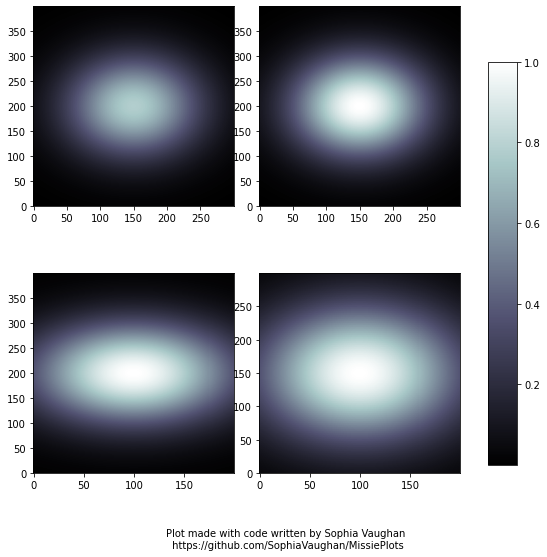

In [6]:
Slice(cube, {0:[50, 100], 1:150, 2:200})

### Keyword arguments:
Again, there are a lot of keyword arguments that can be supplied to this code. Examples for all of them are as follows. </br>
**scales:** To alter the x,y,z scales on the plot pass a dictionary to the scales keyword with the keys 0,1,2 leading to arrays for the x,y,z value of the cube along that axis. The length must therefore be the same as the length of the cube along that axis. Slices are still specified by cube index. </br>
**saveloc:** default: './' - a string specifying the save location for the plot. </br>
**savename:** default: None - a string for the file name (no extention needed) or None if the plot is to been shown instead of saves. </br>
**figsize:** default: (8,8) - a tuple (a,b) where a, b are numbers specifying the figsize. </br>
**font_scale:** default: 1 - an overall scaling for the fontsizes (not recomended to change). </br>
**title:** the title of the plot (str) or a list of strings, one for each subplot. </br>
**xlabel, ylabel, zlabel, cbarlabel:** the labels for the axis and colorbar respectivly (str). These are the same for each subplot. </br>
**xticks, yticks, zticks, cbarticks:**  the ticks to display for each axis/colorbar (list, np.array). These are the same for each subplot. </br>
**xlim, ylim, zlim, cbarlim:**  a length two list with the lower and upper limits of the axis/colorbar. These are the same for each subplot. </br>
**cbar_marks:** a list of numbers corresponding to the values of the colorbar to mark. </br>
**cbar_mark_labels:** a list of strings or numbers with which to label the colorbar marks. </br>
**markpoints** points to mark on the plots. These are specified in a dict with keys 0,1,2 for each key include a list of tuples of length 2 or 3 containing the coordinates of the point to map. If length 3 the first number specifies the index of the slice along that axis to which the point belongs. If it is only length 2 it is plotted on all slices of that axis. The other two numbers specify the scaled coordinates of point to mark on the x and y axis of the plot respectivly (see example). </br>
**cmap:** default: plt.cm.bone - The matplotlib colormap to us. </br>
**norm:** default: None - the normalisation of the colormap. </br>
**zorder_function:** default: internal funtion - a function that takes in the average x,y,z position of a slice and outputs a number specifying the plotting order. Do not change this unless the plotting breaks and some slices appear ontop of others when they shouldn't. </br>

In [7]:
# Because I am lazy I am passing this as dict but you don't have to
keywordexamples = {
    'figsize':(11,8),
    'title':'What a lovely plot!',
    'font_scale':1.2,
    'xlabel':'The x axis',
    'ylabel':'why?......',
    'zlabel':'zzzzzzzzzzzzzzzzzzz',
    'yticks':[-1,0,1],
    'cbarlabel':"It's colour not color",
    'cbar_marks':[0.25,0.5,0.75],
    'cbar_mark_labels':['*', '%', '~'],
    'markpoints':{0:[(50, 1, 1), (0,0)], 1:None, 2:[(200,0.3,0)]},
    'norm':np.arange(0,1.1,0.1)
    }

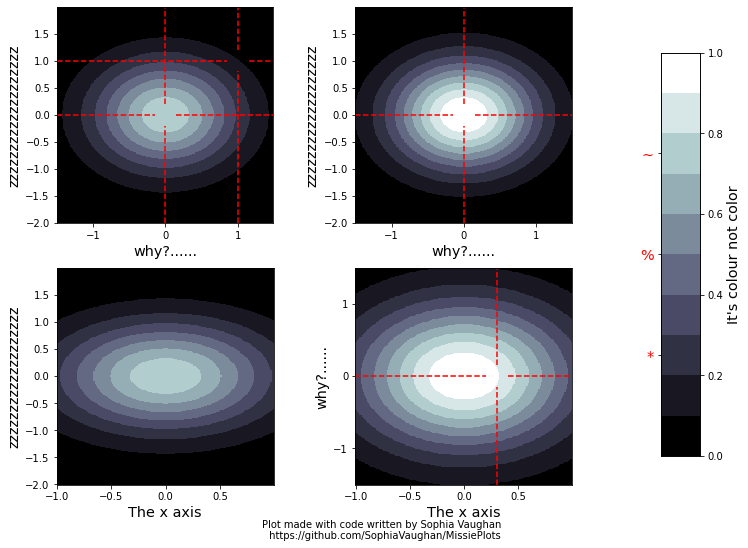

In [8]:
Slice(cube, {0:[50,100], 1:100, 2:200}, scales={0:x, 1:y, 2:z}, **keywordexamples)

## The CubeSlice function: having a 3D cube and 2D slices on the same plot

### Quick start:
As before, aside from the cube, the only other information this funcion requires is the slices to be plotted. These are specified in a dictionary with keys 0,1,2. The first key in the dictionary specifies which axis of the cube is to be plotted on the x axis of the plot, the second, the y axis and the third, the z axis. The values in the dictionary can either be a list of integers, a numpy array of integers, an integer or None where None is used if no slices are to be plotted along that axis. The slices are specified using the cube indexes and not the x,y,z on the plot which can be changes later. These slices are then plotted in a grid of upto 3 columns.

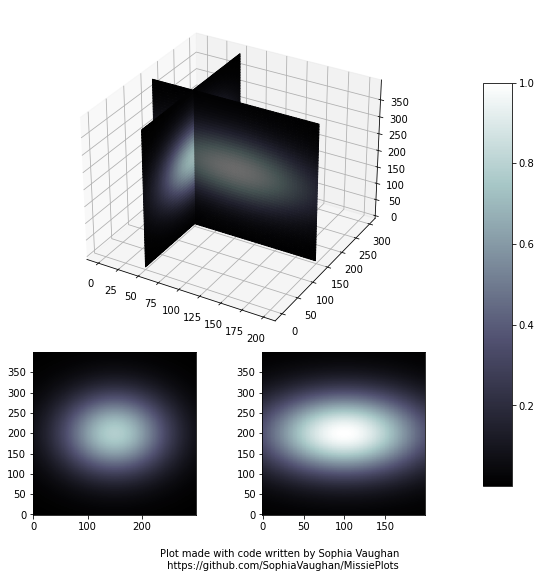

In [9]:
CubeSlice(cube, {0:50, 1:150, 2:None})

### Keyword arguments:
Again, there are a lot of keyword arguments that can be supplied to this code. Examples for all of them are as follows. </br>
**scales:** To alter the x,y,z scales on the plot pass a dictionary to the scales keyword with the keys 0,1,2 leading to arrays for the x,y,z value of the cube along that axis. The length must therefore be the same as the length of the cube along that axis. Slices are still specified by cube index. </br>
**saveloc:** default: './' - a string specifying the save location for the plot. </br>
**savename:** default: None - a string for the file name (no extention needed) or None if the plot is to been shown instead of saves. </br>
**figsize:** default: (8,8) - a tuple (a,b) where a, b are numbers specifying the figsize. </br>
**font_scale:** default: 1 - an overall scaling for the fontsizes (not recomended to change). </br>
**title:** the title of the plot (str) or a list of strings, one for each subplot. </br>
**xlabel, ylabel, zlabel, cbarlabel:** the labels for the axis and colorbar respectivly (str). These are the same for each subplot. </br>
**xticks, yticks, zticks, cbarticks:**  the ticks to display for each axis/colorbar (list, np.array). These are the same for each subplot. </br>
**xlim, ylim, zlim, cbarlim:**  a length two list with the lower and upper limits of the axis/colorbar. These are the same for each subplot. Warning: no cliping is done for the 3d plot so the slices may spill off the edge of the axis.</br>
**cbar_marks:** a list of numbers corresponding to the values of the colorbar to mark. </br>
**cbar_mark_labels:** a list of strings or numbers with which to label the colorbar marks. </br>
**markpoints** points to mark on the plots. These are specified in a dict with keys 0,1,2 for each key include a list of tuples of length 2 or 3 containing the coordinates of the point to map. If length 3 the first number specifies the index of the slice along that axis to which the point belongs. If it is only length 2 it is plotted on all slices of that axis. The other two numbers specify the scaled coordinates of point to mark on the x and y axis of the plot respectivly (see example). </br>
**cmap:** default: plt.cm.bone - The matplotlib colormap to us. </br>
**norm:** default: None - the normalisation of the colormap. </br>
**zorder_function:** default: internal funtion - a function that takes in the average x,y,z position of a slice and outputs a number specifying the plotting order. Do not change this unless the plotting breaks and some slices appear ontop of others when they shouldn't. </br>

In [10]:
# Because I am lazy I am passing this as dict but you don't have to
keywordexamples = {
    'figsize':(9,10),
    'title':'What a lovely plot!',
    'font_scale':1.2,
    'xlabel':'The x axis',
    'ylabel':'why?......',
    'zlabel':'zzzzzzzzzzzzzzzzzzz',
    'xticks':[],
    'yticks':[],
    'zticks':[],
    'cbarlabel':"It's colour not color",
    'cbar_marks':[0.25,0.5,0.75],
    'cbar_mark_labels':['*', '%', '~'],
    'markpoints':{0:[(50, 1, 1), (0,0)], 1:None, 2:[(200,0.3,0)]},
    'norm':np.arange(0,1.1,0.1)
    }

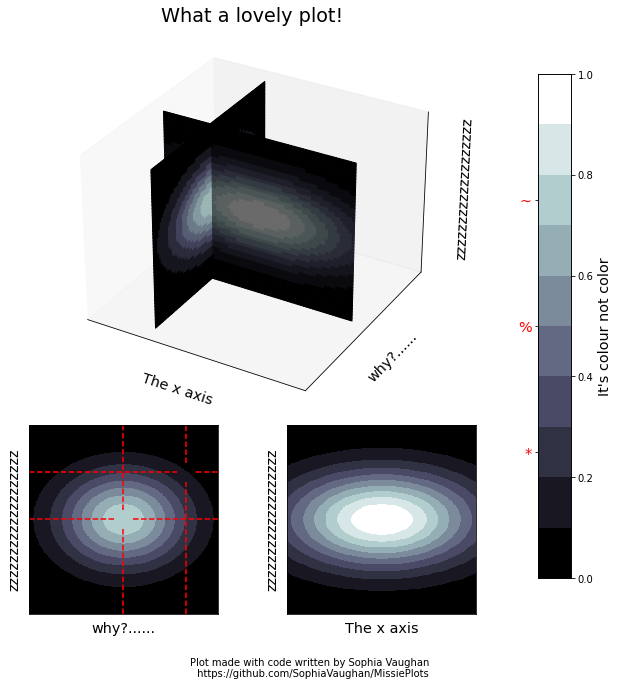

In [11]:
CubeSlice(cube, {0:50, 1:150, 2:None}, scales={0:x, 1:y, 2:z}, **keywordexamples)